In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
data = pd.read_csv('data/lung_cancer_examples.csv')

In [3]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
data.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [5]:
data.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


We'll drop name and surname columns anyway and the rest is already numeric which makes our job much more easier

In [6]:
data.drop(['Name', 'Surname'], axis=1, inplace=True)

In [7]:
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


Let's examine the relationship between results and x's(columns) 

Age

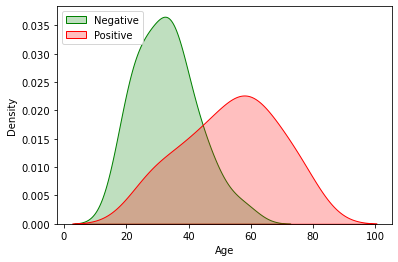

In [8]:
ax = sns.kdeplot(data['Age'][data.Result==0], color='green', label='Negative', shade=True)
sns.kdeplot(data['Age'][data.Result==1], color='red', label='Positive', shade=True)
ax.legend(loc='upper left')

It's as clear as day that as age goes high so does the probability of being cancer

Smokes

In [9]:
data['Smokes'].nunique()

16

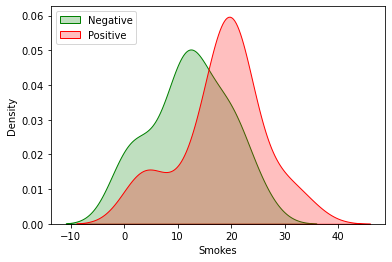

In [10]:
ax = sns.kdeplot(data['Smokes'][data.Result==0], color='green', label='Negative', shade=True)
sns.kdeplot(data['Smokes'][data.Result==1], color='red', label='Positive', shade=True)
ax.legend(loc='upper left')

We can't say that the difference is as clear as day but smoking sure does affect the risk of getting caught to cancer

AreaQ

In [11]:
## No information was given about this column but will still chech if it has any affect on the result set
data['AreaQ'].nunique()

10

<AxesSubplot:xlabel='AreaQ', ylabel='Result'>

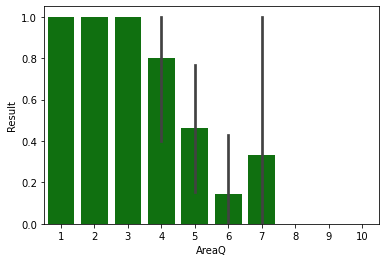

In [12]:
sns.barplot(x=data['AreaQ'], y=data['Result'], color='green')

doesn't look like it implies anything so I'll just drop this for the sake of our model

In [13]:
data.drop(['AreaQ'], axis=1, inplace=True)

In [14]:
data.head()

,Age,Smokes,Alkhol,Result
0,35,3,4,1
1,27,20,5,1
2,30,0,2,0
3,28,0,1,0
4,68,4,6,1


In [15]:
df = data.copy()

In [16]:
df.head()

,Age,Smokes,Alkhol,Result
0,35,3,4,1
1,27,20,5,1
2,30,0,2,0
3,28,0,1,0
4,68,4,6,1


Alcohol

In [17]:
## Rename Alkhol column
df = df.rename(columns={'Alkhol': 'Alcohol'})

In [18]:
df.head()

,Age,Smokes,Alcohol,Result
0,35,3,4,1
1,27,20,5,1
2,30,0,2,0
3,28,0,1,0
4,68,4,6,1


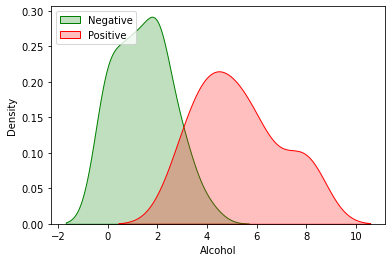

In [19]:
ax = sns.kdeplot(df['Alcohol'][data.Result==0], color='green', label='Negative', shade=True)
sns.kdeplot(df['Alcohol'][data.Result==1], color='red', label='Positive', shade=True)

ax.legend(loc='upper left')

uhhhh, alcohol is not, not good for your health, at least that's what our data says

In [20]:
df.head()

,Age,Smokes,Alcohol,Result
0,35,3,4,1
1,27,20,5,1
2,30,0,2,0
3,28,0,1,0
4,68,4,6,1


In [21]:
y = df['Result']
y

0     1
1     1
2     0
3     0
4     1
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    1
14    1
15    0
16    1
17    0
18    1
19    1
20    1
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    1
38    0
39    0
40    1
41    0
42    1
43    1
44    0
45    0
46    0
47    0
48    1
49    1
50    0
51    1
52    1
53    0
54    0
55    1
56    1
57    1
58    0
Name: Result, dtype: int64

In [22]:
x = df[['Age', 'Smokes', 'Alcohol']]
x

,Age,Smokes,Alcohol
0,35,3,4
1,27,20,5
2,30,0,2
3,28,0,1
4,68,4,6
5,34,0,0
6,58,15,0
7,22,12,2
8,45,2,0
9,52,18,5


In [23]:
x.shape

(59, 3)

In [24]:
y.shape

(59,)

In [25]:
y = y.values.reshape(-1, 1)

In [26]:
y.shape

(59, 1)

Modeling

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
x.head()

,Age,Smokes,Alcohol
0,35,3,4
1,27,20,5
2,30,0,2
3,28,0,1
4,68,4,6


In [29]:
scaler = MinMaxScaler()

In [30]:
x_scaled = scaler.fit_transform(x)

In [31]:
x_scaled = pd.DataFrame(x_scaled, columns=['Age', 'Smokes', 'Alcohol'])

In [32]:
x_scaled.head()

,Age,Smokes,Alcohol
0,0.288136,0.088235,0.500
1,0.152542,0.588235,0.625
2,0.203390,0.000000,0.250
3,0.169492,0.000000,0.125
4,0.847458,0.117647,0.750


In [33]:
y

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2)

In [36]:
x_train.shape

(47, 3)

In [37]:
x_test.shape

(12, 3)

In [38]:
y_train.shape

(47, 1)

In [39]:
y_test.shape

(12, 1)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [42]:
logreg.fit(x_train, y_train)

D:\downloads\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [43]:
y_pred = logreg.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
acc = accuracy_score(y_test, y_pred)

In [46]:
acc

0.9166666666666666

We predicted with a %92 probability of doing it right which is amazing